# Regresja liniowa

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

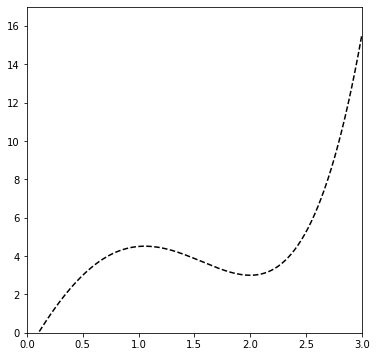

In [11]:
f = lambda x: ((x*2-1)*(0.5*x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca() 
axes.set_xlim([0,3])
axes.set_ylim([0,17])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszą regresję.

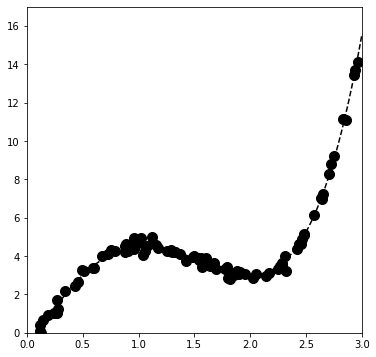

In [13]:
np.random.seed(10)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,17])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [4]:
M1 = np.vstack( (np.ones_like(x), x) ).T
p1 = np.linalg.lstsq(M1, y, rcond=None)

Definiujemy naszą funkcję regresji

In [5]:
f_lr_1 = lambda x: p1[0][1] * x +p1[0][0]

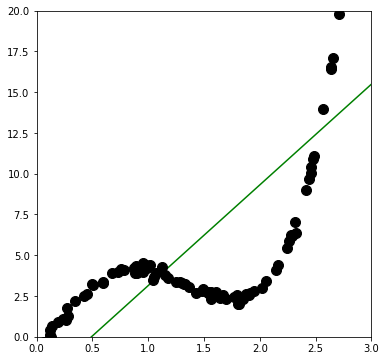

In [6]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_1(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,20])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [7]:
M2 = np.vstack( (np.ones_like(x), x, x**2) ).T
p2 = np.linalg.lstsq(M2, y, rcond=None)

Definiujemy naszą funkcję regresji

In [8]:
f_lr_2 = lambda x: p2[0][2]*pow(x,2) + p2[0][1] * x + p2[0][0] 

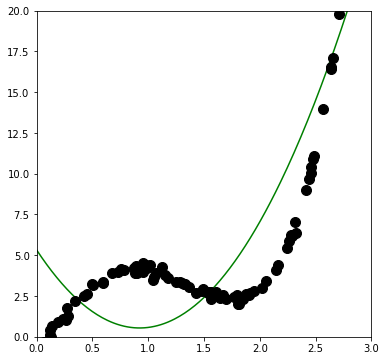

In [9]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_2(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,20])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

# Zadanie
Nauczmy dowolny prosty model regresji na naszych danych. (Można użyć pierwiastów, potęg, exponensów, itd.)

Oraz narysujmy prostą regresji.

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

# Zadanie
Musimy mieć jakąś miarę oceny.

Proszę naucz pozostałe modele i wyświetl ich podsumowanie.

In [14]:
import statsmodels.api as sm
Res1 = sm.OLS(y, M1).fit()
Res2 = sm.OLS(y, M2).fit()

In [15]:
print(Res1.summary2())
print(".....................................")
print(".....................................")
print(".....................................")
print(Res2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.470   
Dependent Variable: y                AIC:                415.2971
Date:               2020-11-21 23:32 BIC:                420.5075
No. Observations:   100              Log-Likelihood:     -205.65 
Df Model:           1                F-statistic:        88.70   
Df Residuals:       98               Prob (F-statistic): 2.22e-15
R-squared:          0.475            Scale:              3.6521  
--------------------------------------------------------------------
          Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     0.9869      0.3877    2.5456    0.0125    0.2175    1.7562
x1        2.1818      0.2317    9.4181    0.0000    1.7221    2.6415
-----------------------------------------------------------------
Omnibus:              22.265       Durbin-Watson:          1.818 
Prob(Omnibus

# Zadanie
Analogiczne wyniki możemy uzusklać za pomocą prostego kodu.

Proszę nauczyć pozostałe modele regresji i wyświetlić ich podsumowanie

In [16]:
import statsmodels.formula.api as smf
# Turn the data into a pandas DataFrame, so that we
# can address them in the formulas with their name
df = pd.DataFrame({'x':x, 'y':y})

# Fit the models, and show the results
Res1F = smf.ols('y~x', df).fit()
Res2F = smf.ols('y ~ x+I(x**2)', df).fit()

In [17]:
print(Res1F.summary())
print(".....................................")
print(".....................................")
print(".....................................")
print(Res2F.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     88.70
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           2.22e-15
Time:                        23:32:18   Log-Likelihood:                -205.65
No. Observations:                 100   AIC:                             415.3
Df Residuals:                      98   BIC:                             420.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9869      0.388      2.546      0.0

# Graficzna ewaluacja modeli

In [ ]:
y_f_lr_1 = f_lr_1(x)
y_f_lr_2 = f_lr_2(x)
y_f_lr_3 = f_lr_3(x)
y_f_lr_4 = f_lr_4(x)
y_f_lr_5 = f_lr_5(x)
y_f_lr_6 = f_lr_6(x)

# Wykres wartości przewidywanych względem prawdziwych.

Proszę sporządzić wykresy dla pozostałych modeli

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(15,15))
ax[0][0].plot(y, y_f_lr_1, 'o', label= "1")
ax[0][0].plot(np.linspace(0,20), np.linspace(0,20), 'k')
ax[0][0].set_xlim([0,20])
ax[0][0].set_ylim([0,20])
ax[0][0].set_xlabel('y')
ax[0][0].set_ylabel('y_hat')

ax[0][1].plot(y, y_f_lr_2, 'o', label= "2")
ax[0][1].plot(np.linspace(0,20), np.linspace(0,20), 'k')
ax[0][1].set_xlim([0,20])
ax[0][1].set_ylim([0,20])
ax[0][0].set_xlabel('y')
ax[0][0].set_ylabel('y_hat')

# Wykres residuów względem wartości dopasowanych

Proszę sporządzić wykresy dla pozostałych modeli

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(15,15))
ax[0][0].plot(y_f_lr_1, y-y_f_lr_1, 'o', label= "1")
ax[0][0].plot(np.linspace(-1,20), np.zeros([50,1]), 'k')
ax[0][0].set_xlim([-1,20])
ax[0][0].set_ylim([-20,20])
ax[0][0].set_xlabel('wartości predykowane')
ax[0][0].set_ylabel('residua')

ax[0][1].plot(y_f_lr_2, y - y_f_lr_2, 'o', label= "2")
ax[0][1].plot(np.linspace(-1,20), np.zeros([50,1]), 'k')
ax[0][1].set_xlim([-1,20])
ax[0][1].set_ylim([-20,20])
ax[0][0].set_xlabel('wartości predykowane')
ax[0][0].set_ylabel('residua')